___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
# Відкрийте файл та виведіть описову статистику
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.describe().T #описова статистика

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


<AxesSubplot:xlabel='fico', ylabel='Count'>

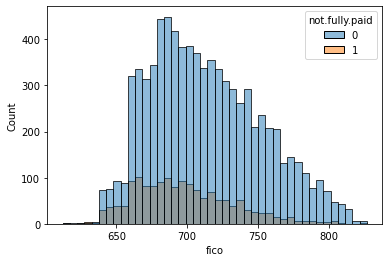

In [4]:
# Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.
sns.histplot(data = df, hue = 'not.fully.paid', x= 'fico')

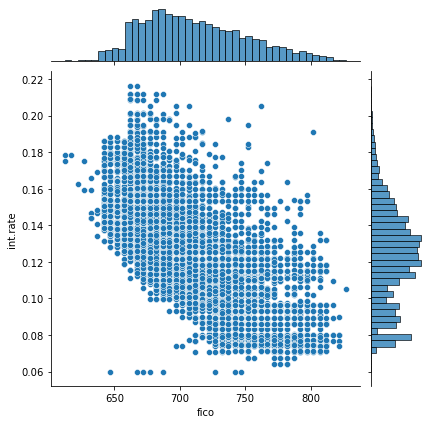

In [5]:
# Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

sns.jointplot(data = df, x = 'fico', y = 'int.rate') #обернена пропорційна залежність між кредитним рейтингом позичальника 
                                                    # та процентною ставкою позики

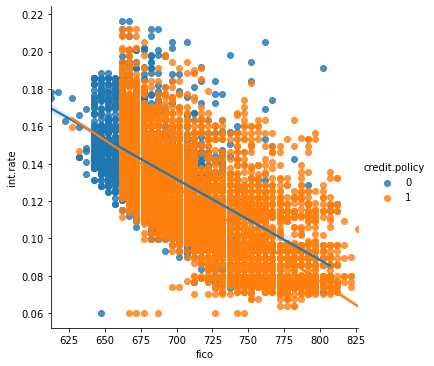

In [6]:
# Побудуйте графік lmplot на основі int.rate та fico. 
# Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

sns.lmplot(data = df, x = 'fico', y='int.rate', hue = 'credit.policy')

In [7]:
# purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies
df = pd.get_dummies(df, columns = ['purpose'])

In [8]:
# Розбийте датасет на тестві та трейнові дані
from sklearn.model_selection import train_test_split
X = df.drop('credit.policy',axis=1)
y = df['credit.policy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [9]:
# Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [28]:
logistic_regression_model = LogisticRegression(max_iter=1000) 
decision_tree_model = DecisionTreeClassifier(max_depth=5)
random_forest_model = RandomForestClassifier()
xgboost_model = xgb.XGBClassifier(n_estimators=100,use_label_encoder=False)

In [29]:
logistic_regression_model.fit(X_train,y_train)
decision_tree_model.fit(X_train,y_train) 
random_forest_model.fit(X_train,y_train)
xgboost_model.fit(X_train,y_train) 

[16:02:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
test_predictions_logistic_regression = logistic_regression_model.predict(X_test)
test_predictions_decision_tree = decision_tree_model.predict(X_test)
test_predictions_random_forest = random_forest_model.predict(X_test)
test_predictions_xgboost = xgboost_model.predict(X_test)


In [14]:
# Для кожної з моделей виведіть матрицю, основні метрики

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
logistic_regression_confusion_matrix = confusion_matrix(y_test, test_predictions_logistic_regression)
logistic_regression_confusion_matrix = pd.DataFrame(logistic_regression_confusion_matrix)

logistic_regression_confusion_matrix

,0,1
0,324,242
1,78,2230


In [34]:
print(accuracy_score(y_test, test_predictions_logistic_regression))

0.8886569241475296


In [35]:
decision_tree_confusion_matrix = confusion_matrix(y_test, test_predictions_decision_tree)
decision_tree_confusion_matrix = pd.DataFrame(decision_tree_confusion_matrix)

decision_tree_confusion_matrix

,0,1
0,524,42
1,4,2304


In [36]:
print(accuracy_score(y_test, test_predictions_decision_tree))

0.9839944328462074


In [37]:
random_forest_confusion_matrix = confusion_matrix(y_test, test_predictions_random_forest)
random_forest_confusion_matrix = pd.DataFrame(random_forest_confusion_matrix)

random_forest_confusion_matrix

,0,1
0,538,28
1,3,2305


In [38]:

print(accuracy_score(y_test, test_predictions_random_forest))

0.989213639526792


In [39]:
xgboost_confusion_matrix = confusion_matrix(y_test, test_predictions_xgboost)
xgboost_confusion_matrix = pd.DataFrame(xgboost_confusion_matrix)

xgboost_confusion_matrix

,0,1
0,547,19
1,2,2306


In [40]:
print(accuracy_score(y_test, test_predictions_xgboost))

0.9926931106471816


In [41]:
from dtreeviz.trees import *

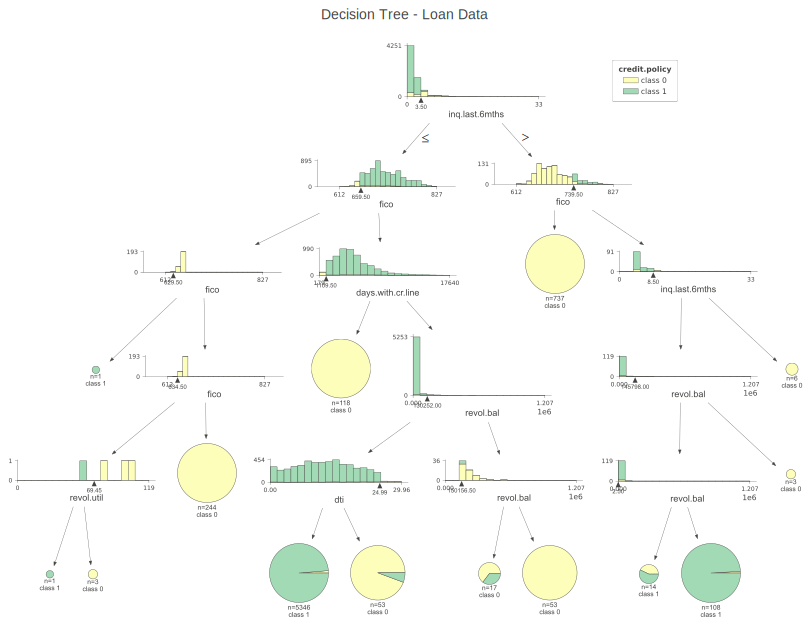

In [42]:
# *Використейте бібіотеку dtreeviz для візуалізації (там, де актуальн
viz = dtreeviz(decision_tree_model, 
               x_data=X_train,
               y_data=y_train,
               target_name='credit.policy',
               feature_names=X_train.columns, 
               title="Decision Tree - Loan Data")

viz

In [55]:
# Використайте ансамбель voting для всіх моделей
from sklearn.ensemble import VotingClassifier
er = VotingClassifier([ ('m1', logistic_regression_model), ('m2', decision_tree_model),('m3', random_forest_model),
                      ('m4', xgboost_model)])
er.fit(X_train, y_train)
er.score(X_test, y_test)

[16:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9895615866388309

In [61]:
# Порівняйте результати моделей та зробіть висновки

# Найбільшу точність дає модель xgboost
TN, FP = xgboost_confusion_matrix.iloc[0, 0], xgboost_confusion_matrix.iloc[0, 1]

FN, TP = xgboost_confusion_matrix.iloc[1, 0], xgboost_confusion_matrix.iloc[1, 1]

In [62]:
# у моделі також високі значення щодо повноти та точності
recall = TP / (TP + FN)

print("Полнота: %.2f%%" % (100 * recall))

Полнота: 99.91%


In [64]:
precision = TP / (TP + FP)

print("Точность: %.2f%%" % (100 * precision))

Точность: 99.18%


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [26]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [66]:
df = pd.read_csv(url)
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [67]:
#1.
df.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [71]:
#2
min(pd.to_datetime(df['date.utc'])),max(pd.to_datetime(df['date.utc']))

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [77]:
pd.to_datetime(df['date.utc']).dt.weekday

0       4
1       3
2       3
3       3
4       3
       ..
2063    1
2064    1
2065    1
2066    1
2067    1
Name: date.utc, Length: 2068, dtype: int64

In [82]:
#3

df.groupby([df.city,pd.to_datetime(df['date.utc']).dt.weekday]).mean()

value
city      date.utc           
Antwerpen 0         27.875000
          1         22.214286
          2         21.125000
          3         27.500000
          4         28.400000
          5         33.500000
          6         21.896552
London    0         23.969697
          1         24.885714
          2         23.460432
          3         24.780142
          4         26.446809
          5         24.977612
          6         24.859155
Paris     0         24.856250
          1         30.999359
          2         29.165753
          3         28.600690
          4         31.617986
          5         25.266154
          6         23.274306

<AxesSubplot:xlabel='date.utc'>

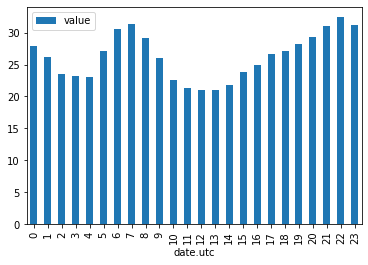

In [90]:
#4
df.groupby(pd.to_datetime(df['date.utc']).dt.hour).mean().plot.bar()